# D - Bildebehandling, diffusjon og Prims algoritme

__Tiltenkte studieprogramer:__ BIDATA

__Innleveringsfrist__: 3.mai kl. 12:00

__Innleveringsformat__: en pdf-fil


## Lasting og vise et bilde

Vi kommer til å tenke på et bilde som en numpy array $f$. Verdien i `f[i, j]` inneholder tre flytetall, en for hver av fargene Rød, Grønn og Blå. Dette er et svart hvitt bilde så vi bruker kun en av disse fargene. For å vise et bilde så bruker vi matplotlib.

Vi ser fra informasjonen om bildet at det er 500 x 375 piksler stort. Matrisen vi lager vil da ha samme størrelse.

Velg en av fargekanalene og legg dataene i en 375x500 nparray. 

In [34]:
# Laster inn bildet image001.png
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Leser inn et bilde fra fil
imagePath = "image001.png"
originalImage = Image.open(imagePath).convert("L")  # Konverter til gråtone (L)

# Konverterer bildet til en NumPy-array
picture = np.array(originalImage)



## 1. Gradienten og kantene i et bilde

Vi tenker på bildet som en numerisk tilnærming til en glatt funksjon $z=f(x,y)$. Vi skal regne ut en tilnærming til gradienten til denne funksjonen. Formelen vi bruker
er $$f_x(x,y) \approx \frac{f(x+\Delta x,y) - f(x-\Delta x,y)}{2\cdot \Delta x}$$ hvor $\Delta x = 1$, og tilsvarende for $f_y$.

Merk at vi bare kan regne ut $f_x$ for verdiene $x=1\dots 499$, siden vi bruker verdiene til siden for $x$ i utregningen.

## Oppgave 1

### a)

Regn ut verdiene for $f_x$ og legg dem i en matrise med navn `fx`. Matrisen `fx` har størrelse $500 \times 375$. Verdiene i `fx` skal være $0$ der de ikke er definert.

Tegn deretter bilde til matrisen `fx`.

### b)

Regn ut verdiene for $f_y$ og legg dem i en matrise med navn `fy`. Matrisen `fy` har størrelse $500 \times 375$. Verdiene i `fy` skal være $0$ der de ikke er definert. 

Tegn deretter bilde til matrisen `fy`.

### c) 

Regn ut lengden til gradienten, det vil si $|\nabla f|$, i hvert punkt og legg dem i en matrise med navn `fgradabs`. Matrisen har størrelse $500\times 375$.
Verdiene skal være $0$ der de ikke er definert.

Tegn bildet som tilhører matrisen `fgradabs`.

### d)

Finn minste og største verdi i matrisen `fgradabs`. Skaler deretter verdiene slik at de ligger mellom $0$ og $1$ og legg resultatet i en matrise med samme navn. Tegn `fgradabs` bildet på nytt. Dere skal ha samme bilde som i c).

### e)

Les igjennom https://en.wikipedia.org/wiki/Edge_detection. 

Forklar, med egne ord, hva vi mener når vi snakker om kanter i et bilde. Forklar hvordan gradienten vi har regnet ut kan brukes til å finne kantene i et bilde.

Det er lett å se med det blotte øye hva kantene bør være i akkurat dette bildet (hint: rundt insektet). Vi skal nå prøve ut noen algoritmer som finner disse kantene.

### f)

Les gjennom https://www.w3schools.com/python/numpy/numpy_ufunc_create_function.asp. Dere bør være i stand til å lage din egen `ufunc` etter å ha lest dette. Dere skal også lære dere å bruke `np.vectorize`. Se https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html

La $c$ være et tall mellom $0$ og $1$. Lag en matrise med navn "kanter" som har verdier $0$ hvis verdien på samme plass i `fgradabs` er mindre enn eller lik $c$, og verdier $1$ hvis verdien i `fgradabs` er større enn $c$. Dvs. anvend funksjonen

```
def kutt(x):
    c = 0.5 # du kan prøve å endre på denne verdien
    if x <= c: return 0.0 else: return 1.0
```

på alle elementene `fgradabs`. Gjør dette ved å lage en numpy `ufunc`.


### g) 

I oppgave f) lærte du en algoritme for å finne kantene i et bilde. Prøv å finn en passende verdi for $c$ slik at problemet beskrevet i e) 
blir løst på en rimelig god måte. Hvordan synes dere algoritmen fungerer på akkurat dette bildet?

##### a) Regn ut verdiene for $f_x$ og legg dem i en matrise med navn `fx`. Matrisen `fx` har størrelse $500 \times 375$. Verdiene i `fx` skal være $0$ der de ikke er definert.Tegn deretter bilde til matrisen `fx`.

In [35]:
fx = np.zeros_like(picture)
fx[:, 1:-1] = (picture[:, 2:] - picture[:, :-2]) / 2

plt.imshow(fx, cmap='gray')
plt.title('Horizontal Gradient - fx')
plt.axis('off')
plt.show()


##### b) Regn ut verdiene for $f_y$ og legg dem i en matrise med navn `fy`. Matrisen `fy` har størrelse $500 \times 375$. Verdiene i `fy` skal være $0$ der de ikke er definert. Tegn deretter bilde til matrisen `fy`.

In [36]:
fy = np.zeros_like(picture)
fy[1:-1, :] = (picture[2:, :] - picture[:-2, :]) / 2


##### c) Regn ut lengden til gradienten, det vil si $|\nabla f|$, i hvert punkt og legg dem i en matrise med navn `fgradabs`. Matrisen har størrelse $500\times 375$. Verdiene skal være $0$ der de ikke er definert.

In [37]:
f_gradabs = np.sqrt(fx**2 + fy**2)
 ## Normalize the gradient magnitude to range [0, 1]

f_gradabs_normalized = (f_gradabs - np.min(f_gradabs)) / (np.max(f_gradabs) - np.min(f_gradabs))

##### d) Finn minste og største verdi i matrisen `fgradabs`. Skaler deretter verdiene slik at de ligger mellom $0$ og $1$ og legg resultatet i en matrise med samme navn. Tegn `fgradabs` bildet på nytt. Dere skal ha samme bilde som i c).

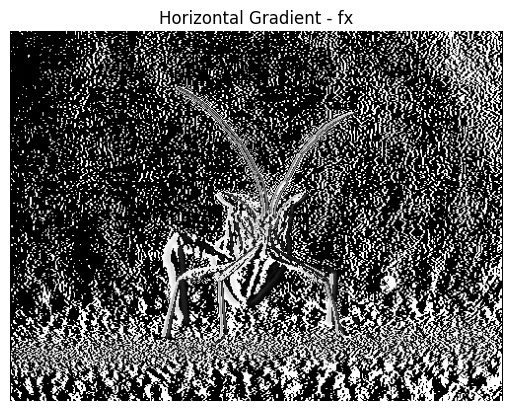

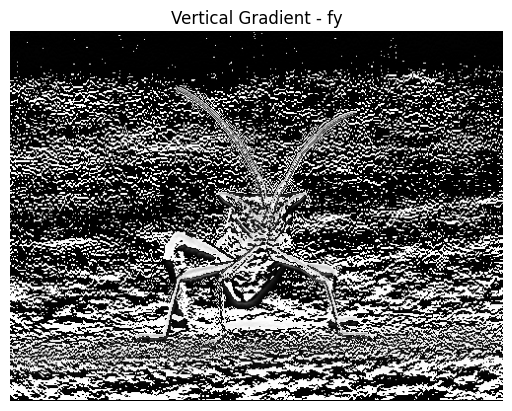

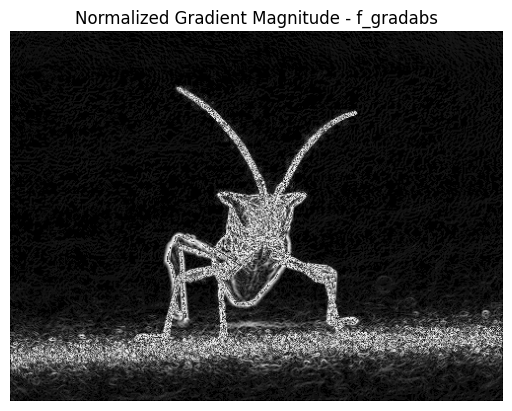

(0.0, 1.0)

In [38]:
min_grad = np.min(f_gradabs_normalized)
max_grad = np.max(f_gradabs_normalized)


plt.imshow(fx, cmap='gray')
plt.title('Horizontal Gradient - fx')
plt.axis('off')
plt.show()


plt.imshow(fy, cmap='gray')
plt.title('Vertical Gradient - fy')
plt.axis('off')
plt.show()

# Plotting the normalized gradient magnitude
plt.imshow(f_gradabs_normalized, cmap='gray')
plt.title('Normalized Gradient Magnitude - f_gradabs')
plt.axis('off')
plt.show()


# Output the minimum and maximum values
(min_grad, max_grad)


##### e) Les igjennom https://en.wikipedia.org/wiki/Edge_detection. Forklar, med egne ord, hva vi mener når vi snakker om kanter i et bilde. Forklar hvordan gradienten vi har regnet ut kan brukes til å finne kantene i et bilde. Det er lett å se med det blotte øye hva kantene bør være i akkurat dette bildet (hint: rundt insektet). Vi skal nå prøve ut noen algoritmer som finner disse kantene. 

##### f) Les gjennom https://www.w3schools.com/python/numpy/numpy_ufunc_create_function.asp. Dere bør være i stand til å lage din egen `ufunc` etter å ha lest dette. Dere skal også lære dere å bruke `np.vectorize`. Se https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html

##### La $c$ være et tall mellom $0$ og $1$. Lag en matrise med navn "kanter" som har verdier $0$ hvis verdien på samme plass i `fgradabs` er mindre enn eller lik $c$, og verdier $1$ hvis verdien i `fgradabs` er større enn $c$. Dvs. anvend funksjonen

 ```
def kutt(x):
    c = 0.5 # du kan prøve å endre på denne verdien
    if x <= c: return 0.0 else: return 1.0
```
på alle elementene `fgradabs`. Gjør dette ved å lage en numpy `ufunc`. 

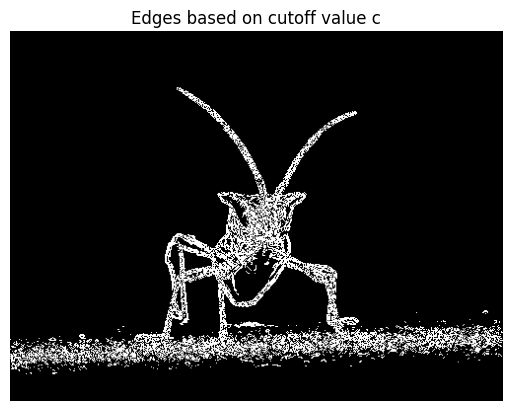

In [23]:
# Define the cutoff function
def cutoff(x, c=0.5):
    return 0.0 if x < c else 1.0

# Vectorize the cutoff function to apply it element-wise
vectorized_cutoff = np.vectorize(cutoff)

# Load the previously computed normalized gradient magnitude matrix
# f_gradabs_normalized = np.load('/mnt/data/f_gradabs.npy')

# Apply the vectorized cutoff function to the gradient magnitude matrix
kanter = vectorized_cutoff(f_gradabs_normalized) 

# Plotting the 'kanter' matrix as an image
plt.imshow(kanter, cmap='gray')
plt.title('Edges based on cutoff value c')
plt.axis('off')  # Turn off the axis
plt.show()

## 2. Diffusjon og endringer i tid

Vi kommer til å se at gradient-metoden kan forbedres ved å bruke en diffusjon på bildet til å glatte ut og fjerne støy i bildet. Vi skal regne ut en sekvens av bilder $F(x,y,t)$ for 
stigende verdier av $t$. 

Ficks lover (https://no.wikipedia.org/wiki/Ficks_diffusjonslover) forklarer diffusjon som en bevaringslov med en spesielle type fluks.

En bevaringslov i en dimensjon tar formen

$$
\frac{\partial F}{\partial t} + \frac{\partial J}{\partial x} = 0,
$$

hvor $J(F,x,t)$ er fluks av stoffet $F$. Formen til $J$ bestemmes ut fra en fysisk modell. Noen viktiger eksempler:

1. $J = aF$ hvor $a$ er en konstant.
2. $J = aF^2$.
3. $J = a\frac{\partial F}{\partial x}$

I flere situasjoner har vi til og med en kombinasjon av alle 3, dvs

$$
J = a_1 F + a_2 F^2 + a_3\frac{\partial F}{\partial x}
$$

## Oppgave 2: 

### a)
Ficks først diffusjonslov sier at $J$ tar en av formene over. Hvilken?

### b)
Ficks andre diffusjonslov gir ligningen som følger fra $J$ og bevaringsloven. Hva blir den?

### c)
Hva representerer isåfall flukser av type 1 og 2? Oppgi situasjoner vår de ville vært passende.

### d)
Hva med den siste muligheten, dvs en summen av alle tre? Når gjelder den? Tror du at systemet vil oppføre seg mest som 1, 2 eller 3? Eller kommer det an på andre faktorer? 

### e)
Forklar hvorfor en bevaringslov for et stoff $F(x,y,t)$ med 2 dimensjoner tar formen

$$
\frac{\partial F}{\partial t} + \frac{\partial I}{\partial x} + \frac{\partial J}{\partial y}= 0,
$$

hvor fluksen $\vec{J} = (I, J)$ oppgis i henholdsvis $x$- og $y$-retningene.

<pre><b>   a) Ficks først diffusjonslov sier at $J$ tar en av formene over. Hvilken? </b> </pre>

Ficks første diffusjonslov beskriver forholdet mellom diffusjonstrøm (fluks) og konsentrasjongradienten. Den antar at fluksen flytter fra områder med høy konsentrasjon til områder med lav konsentrasjon, med en størrelse som er proporsjonal med konsentrasjongradienten (som sier noe om hvordan konsentrasjonen av eet stoff endrer seg over et område). 
Ficks første diffusjonslov sier at fluksen $J$ er proporsjonal med den negative gradienten til konsentrasjonen.
Basert på dette, er den mest sannsynlige formen for $J$ i Ficks første diffusjonslov:

                                               
$$
J = -a \frac{\partial F}{\partial x}
$$

($a$ er diffusjonskoeffisienten, og $F$ er konsentrasjonen av stoffet)



<pre><b> b) Ficks andre diffusjonslov gir ligningen som følger fra $J$ og bevaringsloven. Hva blir den? </b> </pre>

Ficks andre diffusjonslov utledes ved å kombinere $J$ med bevaringsloven. Ficks andre diffusjonslov er en partiell differensiallikning som beskriver hvordan konsentrasjonen endrer seg over tid i forhold til diffusjonen. Ligningen er:
$$
\frac{\partial F}{\partial t} = a \frac{\partial^2 F}{\partial x^2}
$$

($a$ er diffusjonskoeffisienten og $F$ er konsentrasjonen av stoffet).



<pre><b> c) Hva representerer flukser av type 1 og 2? Oppgi situasjoner der de ville vært passende. </b> </pre>

Flukser av typen 1 ($J = aF$) representerer en lineær diffusion hvor fluksen er direkte proporsjonal med konsentrasjonen. Dette er vanlig i mange naturlige prosesser, for eksempel i atmosfæriske forhold der partikler diffusjonerer basert på deres konsentrasjon. Generelt sett er situasjoner hvor type 1-fluksen er passende inkluderer lineær diffusjon av et stoff gjennom et medium med konstant konsentrasjon.

Flukser av typen 2 ($J = aF^2$) representerer en ikke-lineær diffusion hvor fluksen er proporsjonal med kvadratet av konsentrasjonen. Dette kan observeres i mange biologiske systemer, for eksempel i biologiske systemer (cellekulturer eller levesteder), miljøvariabler (lufttrykk eller temperatur).



<pre><b> d) Hva med den siste muligheten, dvs summen av alle tre? Når gjelder den? Tror du at systemet vil oppføre seg mest som  1,  2 eller  3? Eller kommer det an på andre faktorer?</b> </pre>

Kombinasjonen av alle tre typer flukser ($J = a_1 F + a_2 F^2 + a_3\frac{\partial F}{\partial x}$) vil kunne representere mer komplekse systemer hvor diffusjonen er påvirket av både konsentrasjonen selv, dens gradiens, og andre fysiske egenskaper. Dette kan være relevant i systemer med komplekse kjemiske reaksjoner eller når diffusjonen er betinget av forskjellige mekanismer. Hvilken av de tre typene som er mest relevant vil være avhengig av spesifikke detaljer om systemet, for eksempel diffusjonskoeffisienten, konsentrasjonen av stoffet, og eventuelle andre påvirkende faktorer som strømning, reaksjoner, kinetikk, termodynamikk, og om det er homogene eller heterogene medium osv.



<pre><b> e) Forklar hvorfor en bevaringslov for et stoff $F(x,y,t)$ med 2 dimensjoner tar formen

$$
\frac{\partial F}{\partial t} + \frac{\partial I}{\partial x} + \frac{\partial J}{\partial y}= 0,
$$

hvor fluksen $\vec{J} = (I, J)$ oppgis i henholdsvis $x$- og $y$-retningene.</b> </pre>

I et todimensjonelt system er bevaringsloven for et stoff $F(x,y,t)$ utvidet for å inkludere begge retninger for diffusjon. Fluksen $\vec{J}$ er en vektor som representerer strømmen av stoffet i begge retninger, med $I$ for $x$-retningen og $J$ for $y$-retningen. Bevaringsloven sikrer at den totale fluksen av stoffet, enten vertikal eller horisontal, er lik den totale endringen i konsentrasjonen over tid. Dette er et resultat av fysisk begrensning: Stoffet kan ikke oppstå eller forsvinne, men bare flytte fra ett sted til et annet.


## 3. Diffusjon på bilde

Vi lar endringen av gråfargen med hensyn på $t$ være gitt ved 

$$
F_t = I_x + J_y,
$$

hvor $I = g\cdot F_x$ og $J=g\cdot F_y$, og $g$ er konstanten $1$ i denne
oppgaven.

Vi får altså 

$$F_{t} = g \cdot \Delta F$$ 
hvor $$\Delta F = F_{xx} + F_{yy}.$$ 

Vi skal starte med bildet over, slik at vi har initialverdibetingelsen $$F(x,y,0)=f(x,y).$$

Vi ønsker ikke at fargen skal gå ut eller komme inn i bildet, slik at vi trenger betingelsen $F_x = 0$ for venstre og høyre kant i bildet, og $F_y=0$ for
øvre og nedre kant i bildet. Merk at utregningen av de partiellderiverte i forrige oppgave tilfredstiller disse to betingelsene.

Vi bruker forlengs Euler for integrasjonen. Ved steg $t$ så har vi 

$$\frac{F(x,y,t+\Delta t) - F(x,y,t)}{\Delta t} \approx F_{xx}(x,y,t) + F_{yy}(x,y,t),$$

det vil si vi får oppdateringen 

$$F(x,y,t+\Delta t) = F(x,y,t) + \Delta t \cdot (F_ {xx}(x,y,t) + F_{yy}(x,y,t))$$

som vi gjennomfører et gitt antall ganger.

Faktoren $\Delta F = F_{xx} + F_{yy}$ må tilnærmes numerisk. Vi bruker 

$$F_{xx}(x,y,t) \approx \frac{F_x(x+\Delta x,y,t) - F_x(x-\Delta x,y,t)}{2\Delta x}$$
og tilsvarende for $F_{yy}$.

Vi må ha steg $\Delta t$ som er små nok. Dere kan eksperimentere med ulike verdier, hvor dere starter med $\Delta t = 0.5$. 

## Oppgave 3

### a) 

Implementer integrasjonen beskrevet over og vis bildene som lages.

### b) 

Eksperimenter med ulike antall oppdateringer og ulike verdier for $\Delta t$ i a). Beskriv hva du observerer.

### c)

Gjennomfør analysen fra Oppgave 1 for bildet som blir generert fra a). Prøv å finn en god kombinasjon av verdier for $c$, $\Delta t$ og antall oppdateringer slik at 
algoritmen fra Oppgave 1 kombinert med det diffuserte bilde gir en rimelig god beskrivelse av kantene i bildet. 


$$
F_t = I_x + J_y,
$$

$$F_{t} = g \cdot \Delta F$$ 
$$\Delta F = F_{xx} + F_{yy}.$$ 

##### a) Implementerer integrasjonen beskrevet over og viser bildene som lages

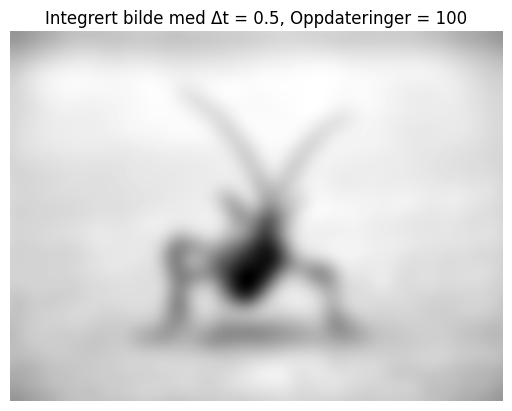

In [24]:
g = 1.0
# Endrer disse to verdiene i 3b:
deltaT = 0.5
numUpdates = 100


# Funksjon for å beregne Fxx og Fyy numerisk
def calculateSecondDerivative(F, deltaX):
    Fx = (np.roll(F, shift=-1, axis=0) - np.roll(F, shift=1, axis=0)) / (2 * deltaX)
    Fy = (np.roll(F, shift=-1, axis=1) - np.roll(F, shift=1, axis=1)) / (2 * deltaX)

    Fxx = (np.roll(Fx, shift=-1, axis=0) - np.roll(Fx, shift=1, axis=0)) / (2 * deltaX)
    Fyy = (np.roll(Fy, shift=-1, axis=1) - np.roll(Fy, shift=1, axis=1)) / (2 * deltaX)

    return Fxx, Fyy


# Forlengs Euler-integrasjon
def ForwardEuler(intensityF, deltaT, numUpdates, deltaX):
    for _ in range(numUpdates):
        Fxx, Fyy = calculateSecondDerivative(intensityF, deltaX)
        deltaF = Fxx + Fyy
        intensityF = intensityF + deltaT * g * deltaF

        # Boundary conditions
        intensityF[:, 0] = intensityF[:, 1]
        intensityF[:, -1] = intensityF[:, -2]
        intensityF[0, :] = intensityF[1, :]
        intensityF[-1, :] = intensityF[-2, :]

    return intensityF


# Oppgave 3a: Initialisering av bilde og integrasjon
def createAndShowImage(f, deltaT, numUpdates):
    resultF = ForwardEuler(f, deltaT, numUpdates, 1.0)

    # Viser det integrerte bildet
    plt.imshow(resultF, cmap='gray')
    plt.title(f"Integrert bilde med Δt = {deltaT}, Oppdateringer = {numUpdates}")
    plt.axis('off')  # Fjerne aksene for en renere visning
    plt.show()

createAndShowImage(picture, deltaT, numUpdates)


##### b) Eksperimenterer med antall ulike oppdateringer og ulike verdier for t. Beskriv hva du observerer.

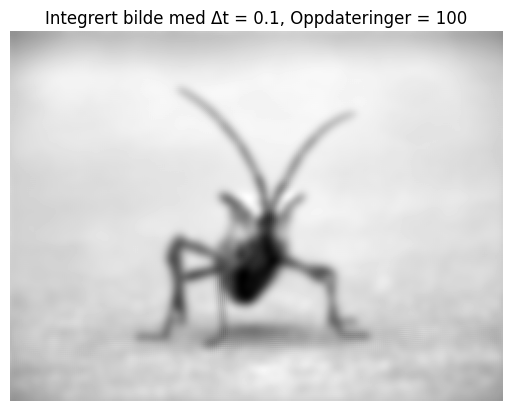

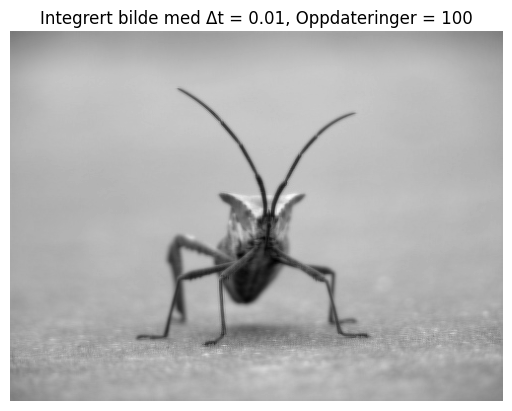

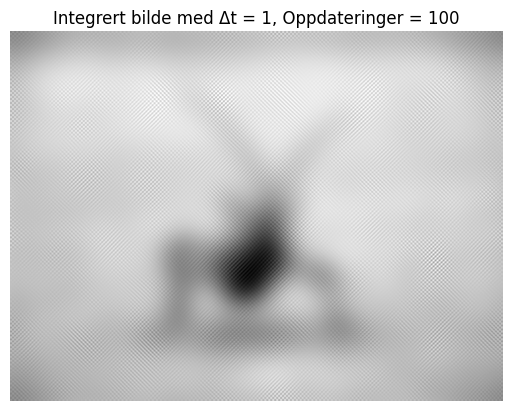

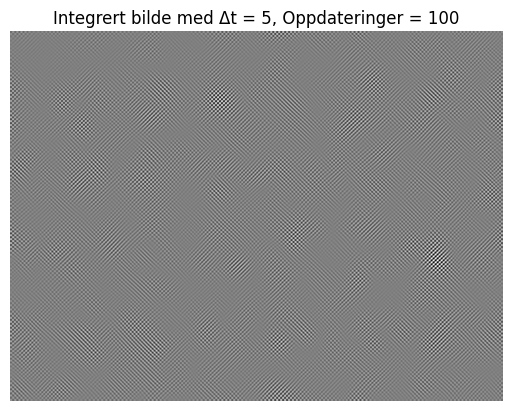

In [25]:
g = 1.0
# Endrer disse to verdiene i 3b:
deltaT = 0.5 
numUpdates = 100 


createAndShowImage(picture, deltaT=0.1, numUpdates=100)
createAndShowImage(picture, deltaT=0.01, numUpdates=100)
createAndShowImage(picture, deltaT=1, numUpdates=100)
createAndShowImage(picture, deltaT=5, numUpdates=100)


# En mindre deltaT og flere oppdateringer gir bedre resultater, men det kan også øke tiden det tar og beregne.
# større numUpdates verdi vil gjøre at bilde blir mer blurry.


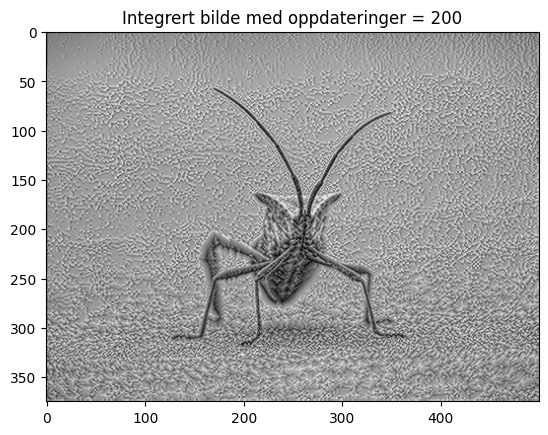

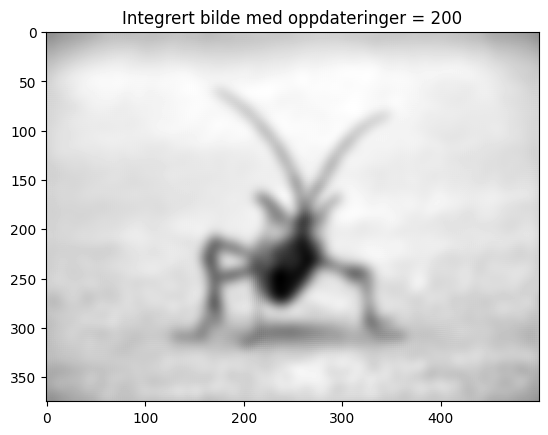

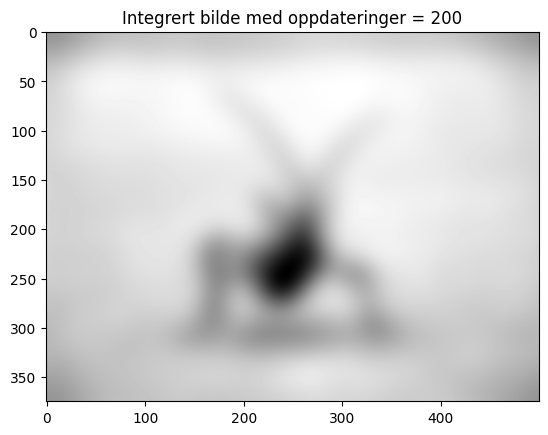

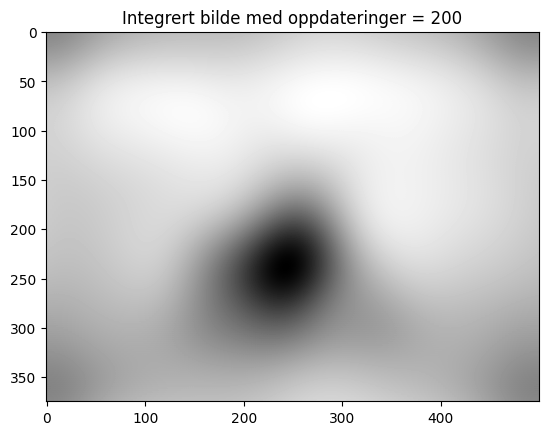

In [26]:
def createAndShowImage(f, deltaT, numUpdates):
    # Gjennomfører forlengs Euler-integrasjon
    resultF = ForwardEuler(f, deltaT, numUpdates, 1.0)

    # Viser bilder
    plt.imshow(f, cmap='gray')
    plt.title("Integrert bilde med oppdateringer = 200")
    plt.imshow(resultF, cmap='gray')
    plt.show()


createAndShowImage(picture, deltaT, numUpdates=1)
createAndShowImage(picture, deltaT, numUpdates=40)
createAndShowImage(picture, deltaT, numUpdates=200)
createAndShowImage(picture, deltaT, numUpdates=1000)

##### c) Gjennomfører analysen fra oppgave 1 for bildet som blir generert fra a). Prøv å finn en god kombinasjon av verdier for $c$, $\Delta t$ og antall oppdateringer slik at algoritmen fra Oppgave 1 kombinert med det diffuserte bilde gir en rimelig god beskrivelse av kantene i bildet. 

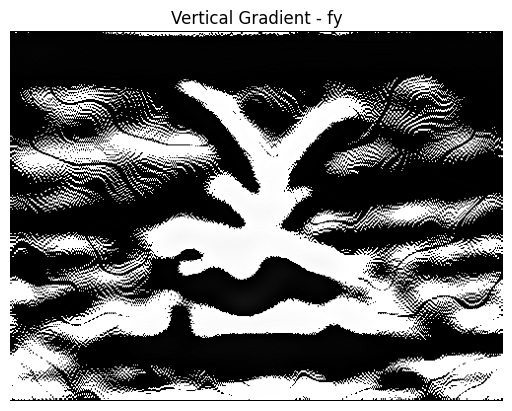

In [27]:
# Leser inn et bilde fra fil
image_path = "imgA.png"
original_image = Image.open(image_path).convert("L")  # Konverter til gråtone (L)

# Konverterer bildet til en NumPy-array
pic = np.array(original_image)

fy = np.zeros_like(pic)
fy[1:-1, :] = (pic[2:, :] - pic[:-2, :]) / 2

# Plotting the vertical gradient fy
plt.imshow(fy, cmap='gray')
plt.title('Vertical Gradient - fy')
plt.axis('off')
plt.show()

In [28]:
f_gradabs = np.sqrt(fx**2 + fy**2)
 ## Normalize the gradient magnitude to range [0, 1]

f_gradabs_normalized = (f_gradabs - np.min(f_gradabs)) / (np.max(f_gradabs) - np.min(f_gradabs))

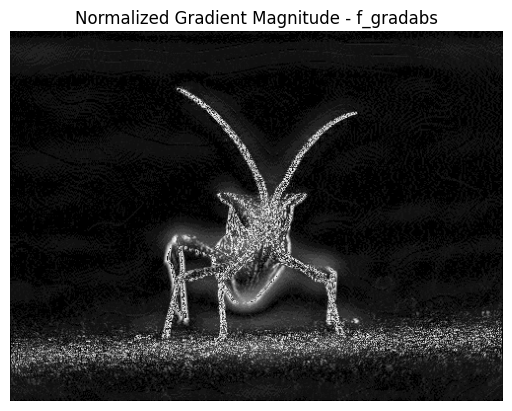

(0.0, 1.0)

In [29]:
min_grad = np.min(f_gradabs_normalized)
max_grad = np.max(f_gradabs_normalized)


# Plotting the normalized gradient magnitude
plt.imshow(f_gradabs_normalized, cmap='gray')
plt.title('Normalized Gradient Magnitude - f_gradabs')
plt.axis('off')
plt.show()

# Output the minimum and maximum values
(min_grad, max_grad)

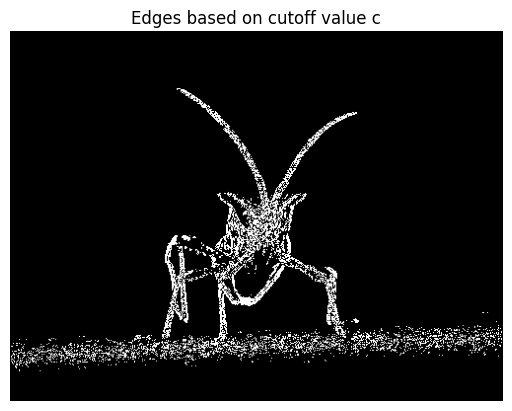

In [30]:
# Define the cutoff function
def cutoff(x, c=0.5):
    return 0.0 if x < c else 1.0

# Vectorize the cutoff function to apply it element-wise
vectorized_cutoff = np.vectorize(cutoff)

# Load the previously computed normalized gradient magnitude matrix
# f_gradabs_normalized = np.load('/mnt/data/f_gradabs.npy')

# Apply the vectorized cutoff function to the gradient magnitude matrix
kanter = vectorized_cutoff(f_gradabs_normalized) 

# Plotting the 'kanter' matrix as an image
plt.imshow(kanter, cmap='gray')
plt.title('Edges based on cutoff value c')
plt.axis('off')  # Turn off the axis
plt.show()

## 4. Mer diffusjon på et bilde 

Vi skal igjen prøve å glatte ut bildet med diffusjon med differensiallikningen 

$$
F_t = I_x + J_y,
$$

hvor $I = g\cdot F_x$, og $J=g\cdot F_y$, men denne gangen er $g$ funksjonen $$g(|\nabla F|)= \frac{1}{\sqrt{1 + \frac{|\nabla F|^2}{\lambda ^2}}}$$ for et tall $\lambda$. Merk at hvis $g$ er en konstant så har vi samme differensiallikning som i forrige oppgave. 

Ideen er at å velge en passende verdi for $\lambda$ vil gi en diffusjon hvor de skarpe kantene blir bevart lengre i diffusjonen. 

## Oppgave 4

### a) 

Tegn grafen til $g(x)$ for ulike verdier av $\lambda$. 

#### i) 

Hva vil $g(|\nabla F|)$ gjøre med store verdier av $|\nabla F|$? 

#### ii) 

Hva vil $g(|\nabla F|)$ gjøre med små verdier av $|\nabla F|$? 

#### iii) 

Hvilken innflytelse har $\lambda$ for hva som skjer i) og ii)?

### b) 

Implementer integrasjonen beskrevet over og vis bildene som lages.

### c) 

Eksperimenter med ulike antall oppdateringer og ulike verdier for $\Delta t$  og $\lambda$ i b). Beskriv hva du observerer.

Hvilken innflytelse har ulike verdier for $\lambda$ på resultatene?

### d)

Gjennomfør analysen fra Oppgave 1 for bildet som blir generert fra b). Prøv å finn en god kombinasjon av verdier for $c$, $\lambda$, $\Delta t$ og antall oppdateringer slik at vi får en god beskrivelse av kantene i bildet. 


##### a) Tegn grafen til $g(x)$ for ulike verdier av $\lambda$. 

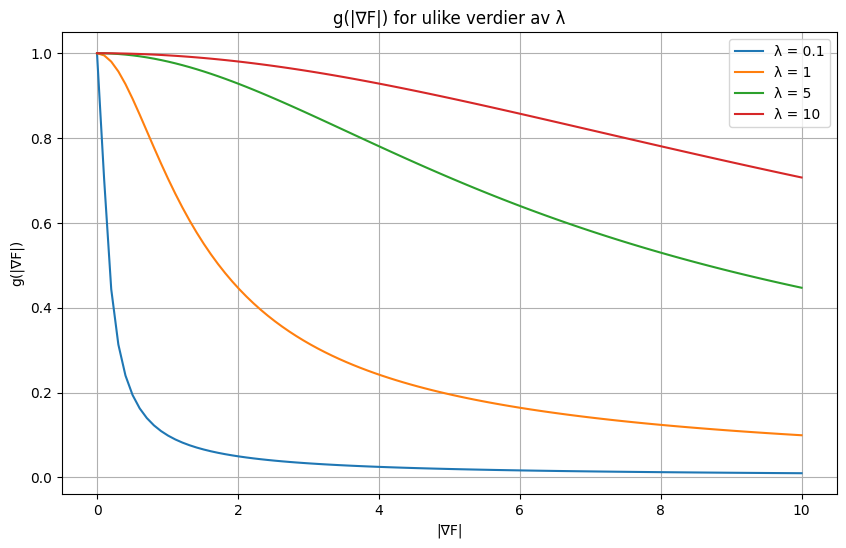

In [31]:
# Definerer funksjonen g(|∇F|)
def g(gradF, lambdaValue):
    return 1 / np.sqrt(1 + (gradF**2) / (lambdaValue**2))

# Verdier av |∇F| fra 0 til 10
gradFValues = np.linspace(0, 10, 100)

# Ulike verdier av lambda
lambdaValues = [0.1, 1, 5, 10]

# Plotter g(|∇F|) for ulike verdier av lambda
plt.figure(figsize=(10, 6))
for lambdaValue in lambdaValues:
    plt.plot(gradFValues, g(gradFValues, lambdaValue), label=f'λ = {lambdaValue}')

plt.title('g(|∇F|) for ulike verdier av λ')
plt.xlabel('|∇F|')
plt.ylabel('g(|∇F|)')
plt.legend()
plt.grid(True)
plt.show()


i) For store verdier av F, vil g(F) nærme seg 0. Dette betyr at effekten av diffusjonen blir mindre for områder med høy gradient, som vanligvis tilsvarer de skarpe kantene i bildet. De skarpe kantene vil dermed bevares bedre under diffusjonsprosessen. 

ii) For småe verdier av F, vil g(F) nærme seg 1. Dette er en indikasjon på at diffusjonen vil være mer effektiv i områder med lav gradient, noe som tilsvarer jevne eller homogene områder i bildet. Diffusjonen vil derfor glatte ut disse områdene mer.

iii) Verdien av lambda bestemmer hvor raskt g(F) avtar med økende F. En lav lambda verdi betyr at g(F) raskt nærmer seg 0 selv for relativt små verdier av F, noe som resulterer i at selv mindre skarpe kanter bevares. En høy lambda-verdi betyr at g(F) forblir nærmere 1 for et bredere spekter av F-verdier, noe som tillater mer diffusjon før den begynner å bevare kanter. Dermed kontrollerer lambda overgangen mellom områder med høy og lav diffusjon og dermed hvor skarpt bilder bevares under diffusjonsprosessen. 

##### b) Implementer integrasjonen beskrevet over og vis bildene som lages.

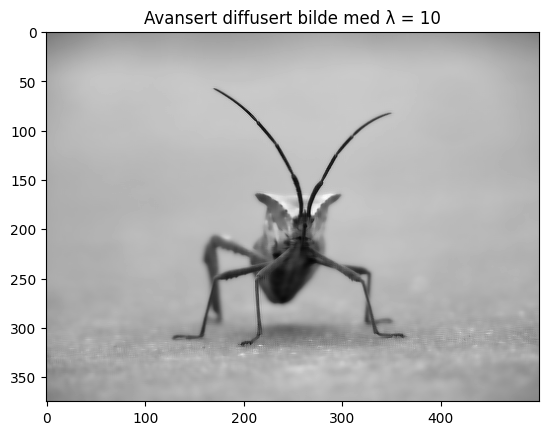

In [39]:
def complicatedDiffusion(pic, lambdaValue, dt, steps):
    F = pic.copy().astype(np.float64)
    dx = dy = 1.0  # Antar at Δx = Δy = 1

    for _ in range(steps):
        # Beregner gradientkomponentene Fx og Fy
        Fx = np.zeros_like(F)
        Fy = np.zeros_like(F)
        Fx[1:-1, :] = (F[2:, :] - F[:-2, :]) / (2*dx)
        Fy[:, 1:-1] = (F[:, 2:] - F[:, :-2]) / (2*dy)

        # Beregner |∇F|
        gradF = np.sqrt(Fx**2 + Fy**2)

        # Beregner g(|∇F|)
        gValue = g(gradF, lambdaValue)

        # Beregner diffusjonskomponentene Ix og Jy
        Ix = np.zeros_like(F)
        Jy = np.zeros_like(F)
        Ix[1:-1, :] = (gValue[2:, :] * Fx[2:, :] - gValue[:-2, :] * Fx[:-2, :]) / (2*dx)
        Jy[:, 1:-1] = (gValue[:, 2:] * Fy[:, 2:] - gValue[:, :-2] * Fy[:, :-2]) / (2*dy)

        # Oppdaterer F basert på diffusjonsligningen
        F += dt * (Ix + Jy)

        # Påfører Neumann randbetingelser (gradient = 0 ved kantene)
        F[0, :] = F[1, :]
        F[-1, :] = F[-2, :]
        F[:, 0] = F[:, 1]
        F[:, -1] = F[:, -2]

    return F

# Eksempel på kjøring
lambdaValue = 10  # Eksperimenter med ulike verdier
dt = 0.1  # Tidssteg
steps = 20  # Antall oppdateringer
diffusedPicture1 = complicatedDiffusion(picture, lambdaValue, dt=dt, steps=steps)
diffusedPicture2 = complicatedDiffusion(picture, lambdaValue= 1, dt=dt, steps=steps)
diffusedPicture3 = complicatedDiffusion(picture, lambdaValue = 5, dt=dt, steps=steps)
diffusedPicture4 = complicatedDiffusion(picture, lambdaValue = 10, dt=dt, steps=steps)


# Viser det diffuserte bildet
plt.imshow(diffusedPicture1, cmap='gray')
plt.title('Avansert diffusert bilde med λ = 10')
plt.show()


##### c) Eksperimenter med ulike antall oppdateringer og ulike verdier for $\Delta t$  og $\lambda$ i b). Beskriv hva du observerer. Hvilken innflytelse har ulike verdier for $\lambda$ på resultatene?

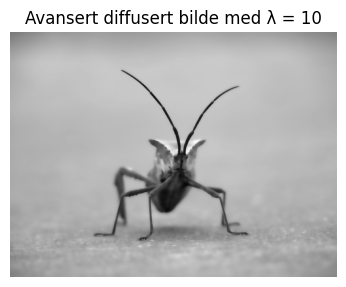

Text(0.5, 1.0, 'Avansert diffusert bilde med λ = 10')

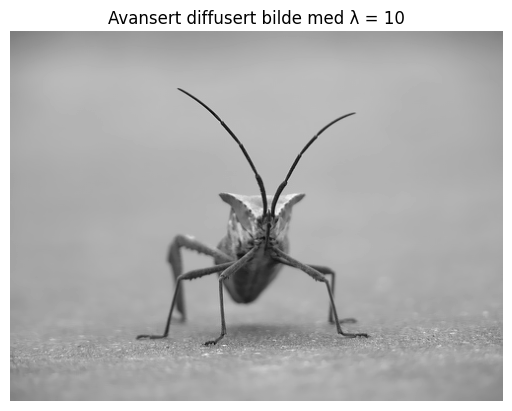

In [47]:
# Eksempel på kjøring
lambdaValue = 10  # Eksperimenter med ulike verdier
dt = 0.1  # Tidssteg
steps = 20  # Antall oppdateringer
diffusedPicture1 = complicatedDiffusion(picture, lambdaValue, dt=dt, steps=steps)
diffusedPicture2 = complicatedDiffusion(picture, lambdaValue= 1, dt=dt, steps=steps)
diffusedPicture3 = complicatedDiffusion(picture, lambdaValue = 5, dt=dt, steps=steps)
diffusedPicture4 = complicatedDiffusion(picture, lambdaValue = 10, dt=dt, steps=steps)

fig = plt.figure(figsize=(10,7))

fig.add_subplot(2,2,1)

# Viser det diffuserte bildet
plt.imshow(diffusedPicture1, cmap='gray')
plt.axis('off')
plt.title('Avansert diffusert bilde med λ = 10')
plt.show()

fig.add_subplot(2,2,2)
plt.imshow(diffusedPicture2, cmap='gray')
plt.axis('off')
plt.title('Avansert diffusert bilde med λ = 10')



##### d) Gjennomfør analysen fra Oppgave 1 for bildet som blir generert fra b). Prøv å finn en god kombinasjon av verdier for $c$, $\lambda$, $\Delta t$ og antall oppdateringer slik at vi får en god beskrivelse av kantene i bildet. 